<a href="https://colab.research.google.com/github/nijinpaul/Assignments/blob/main/ASSIGNMENT_NAIVE_BAYES_(SALARY_DATASET).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prepare a classification model using Naive Bayes for salary data 

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
# Loading train set
df_train=pd.read_csv('/content/SalaryData_Train.csv')
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [98]:
# Loading test set
df_test=pd.read_csv('/content/SalaryData_Test.csv')
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [99]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [100]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [101]:
df_train['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [102]:
print('Shape of train dataframe before dropping duplicates',df_train.shape)
print('Shape of test dataframe before dropping duplicates',df_test.shape)


Shape of train dataframe before dropping duplicates (30161, 14)
Shape of test dataframe before dropping duplicates (15060, 14)


In [103]:
df_train.drop_duplicates(keep=False,inplace=True)

In [104]:
df_test.drop_duplicates(keep=False,inplace=True)

In [105]:
print('Shape of train dataframe after dropping duplicates',df_train.shape)
print('Shape of test dataframe after dropping duplicates',df_test.shape)


Shape of train dataframe after dropping duplicates (24943, 14)
Shape of test dataframe after dropping duplicates (13450, 14)


In [106]:
df_train.drop('native',axis=1,inplace=True)#removing unwanted column

In [107]:
df_test.drop('native',axis=1,inplace=True)  #removing unwanted column

In [108]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K


In [109]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,<=50K


In [110]:
# Label Encoding Categorical Columns of train and test dataset to convert to numertical

from sklearn import preprocessing

# Making a list of categorical columns
cols=['workclass','education','maritalstatus','occupation','relationship','race','sex','Salary']  

le=preprocessing.LabelEncoder()
for col in cols:
    
    df_train[col]=le.fit_transform(df_train[col])
    df_test[col]=le.fit_transform(df_test[col])
    print(le.classes_)

[' Federal-gov' ' Local-gov' ' Private' ' Self-emp-inc'
 ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']
[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']
[' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']
[' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']
[' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White']
[' Female' ' Male']
[' <=50K' ' >50K']


In [111]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,0
1,50,4,9,13,2,3,0,4,1,0,0,13,0
2,38,2,11,9,0,5,1,4,1,0,0,40,0
3,53,2,1,7,2,5,0,2,1,0,0,40,0
4,28,2,9,13,2,9,5,2,0,0,0,40,0


In [112]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,0
1,38,2,11,9,2,4,0,4,1,0,0,50,0
2,28,1,7,12,2,10,0,4,1,0,0,40,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,1
4,34,2,0,6,4,7,1,4,1,0,0,30,0


In [113]:
## Checking output column of train dataset
df_train['Salary'].value_counts()

0    18486
1     6457
Name: Salary, dtype: int64

In [114]:
print("Percent of data labelled salary as 0:",((df_train['Salary']==0).sum()/len(df_train)*100))
print("Percent of data labelled salary as 1:",((df_train['Salary']==1).sum()/len(df_train)*100))

Percent of data labelled salary as 0: 74.1129775889027
Percent of data labelled salary as 1: 25.887022411097306


## Feature selection on train dataset using ExtraTreesClassifier

In [115]:
x=df_train.iloc[:,:-1]
y=df_train.iloc[:,-1]
print(x)
print(y)

       age  workclass  education  educationno  maritalstatus  occupation  \
0       39          5          9           13              4           0   
1       50          4          9           13              2           3   
2       38          2         11            9              0           5   
3       53          2          1            7              2           5   
4       28          2          9           13              2           9   
...    ...        ...        ...          ...            ...         ...   
30154   53          2         12           14              2           3   
30155   22          2         15           10              4          10   
30156   27          2          7           12              2          12   
30158   58          2         11            9              6           0   
30160   52          3         11            9              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  
0             

In [116]:
# checking target type
from sklearn.utils.multiclass import type_of_target
type_of_target(y)


'binary'

In [117]:
x=np.nan_to_num(x)
y=np.nan_to_num(y)

In [118]:
#np.isnan(x.any()) #and gets False
#np.isfinite(x.all()) #and gets True

In [119]:
#np.isnan(y.any()) #and gets False
#np.isfinite(y.all()) #and gets True

In [120]:
#x[np.isfinite(x) == True] = 0
#y[np.isfinite(y) == True] = 0

In [121]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=10)
model.fit(x,y)
print(model.feature_importances_)


[0.22986672 0.0492631  0.04044749 0.0877685  0.07763774 0.08856422
 0.11052152 0.01753716 0.02118869 0.11177914 0.03473288 0.13069285]


In [122]:
df_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'Salary'],
      dtype='object')

In [123]:
cols=['age','workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek']
feature_imp=pd.Series(model.feature_importances_,index=cols).sort_values(ascending=False)
feature_imp

age              0.229867
hoursperweek     0.130693
capitalgain      0.111779
relationship     0.110522
occupation       0.088564
educationno      0.087768
maritalstatus    0.077638
workclass        0.049263
education        0.040447
capitalloss      0.034733
sex              0.021189
race             0.017537
dtype: float64

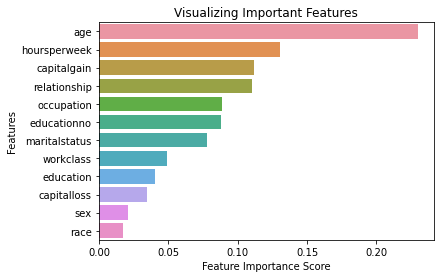

In [124]:
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


In [125]:
## Dropping the fivecolumns having least feature importance
df_train.drop(['workclass','education','capitalloss','sex','race'],axis=1,inplace=True)

In [126]:
## dropping the same columns from test dataset
df_test.drop(['workclass','education','capitalloss','sex','race'],axis=1,inplace=True)

In [127]:
df_train.head()

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,39,13,4,0,1,2174,40,0
1,50,13,2,3,0,0,13,0
2,38,9,0,5,1,0,40,0
3,53,7,2,5,0,0,40,0
4,28,13,2,9,5,0,40,0


In [128]:
df_test.head()

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,25,7,4,6,3,0,40,0
1,38,9,2,4,0,0,50,0
2,28,12,2,10,0,0,40,1
3,44,10,2,6,0,7688,40,1
4,34,6,4,7,1,0,30,0


In [129]:
df_train[['age','capitalgain','hoursperweek']].describe()

,age,capitalgain,hoursperweek
count,24943.000000,24943.000000,24943.000000
mean,39.433909,1302.317724,41.283045
std,13.218143,8071.604978,12.592211
min,17.000000,0.000000,1.000000
25%,29.000000,0.000000,40.000000
50%,38.000000,0.000000,40.000000
75%,48.000000,0.000000,46.000000
max,90.000000,99999.000000,99.000000


In [130]:
df_test[['age','capitalgain','hoursperweek']].describe()

,age,capitalgain,hoursperweek
count,13450.000000,13450.000000,13450.000000
mean,39.458364,1237.306468,41.158439
std,13.455382,8050.662571,12.417740
min,17.000000,0.000000,1.000000
25%,29.000000,0.000000,40.000000
50%,38.000000,0.000000,40.000000
75%,48.000000,0.000000,45.000000
max,90.000000,99999.000000,99.000000


In [131]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

# Fitting on train data
scaler.fit(df_train[['age','capitalgain','hoursperweek']])

# Transforming train data
df_train[['age','capitalgain','hoursperweek']]= scaler.transform(df_train[['age','capitalgain','hoursperweek']])

# Transforming test data
df_test[['age','capitalgain','hoursperweek']]= scaler.transform(df_test[['age','capitalgain','hoursperweek']])

In [132]:
## Checking train dataset after standardization

df_train.head()

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,-0.032827,13,4,0,1,0.107996,-0.101894,0
1,0.799379,13,2,3,0,-0.161349,-2.246120,0
2,-0.108483,9,0,5,1,-0.161349,-0.101894,0
3,1.026344,7,2,5,0,-0.161349,-0.101894,0
4,-0.865034,13,2,9,5,-0.161349,-0.101894,0


In [133]:
## Checking test dataset after standardization

df_test.head()

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,-1.091999,7,4,6,3,-0.161349,-0.101894,0
1,-0.108483,9,2,4,0,-0.161349,0.692264,0
2,-0.865034,12,2,10,0,-0.161349,-0.101894,1
3,0.345448,10,2,6,0,0.791145,-0.101894,1
4,-0.411103,6,4,7,1,-0.161349,-0.896052,0


In [134]:
## Checking output variable of train data
df_train['Salary'].value_counts()

0    18486
1     6457
Name: Salary, dtype: int64

## Creating Naive Bayes' model

In [135]:
# Splitting train data

X_train=df_train.iloc[:,:-1]
Y_train=df_train.iloc[:,-1]

In [136]:
# Splitting test data

X_test=df_test.iloc[:,:-1]
Y_test=df_test.iloc[:,-1]

In [137]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [138]:
y_pred =  nb.predict(X_test)

In [139]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix1=confusion_matrix(Y_test, y_pred)
conf_matrix1

array([[9839,  254],
       [2581,  776]])

Text(20.722222222222214, 0.5, 'True Class')

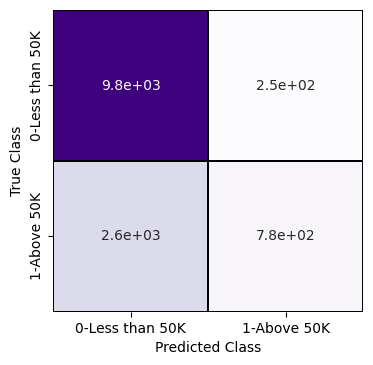

In [140]:
fig, ax= plt.subplots(1,1, figsize=(4,4),dpi=100)

xlabels=['0-Less than 50K','1-Above 50K']
ylabels=['0-Less than 50K','1-Above 50K']

sns.heatmap(conf_matrix1,annot=True, cbar=None, cmap="Purples",xticklabels=xlabels,yticklabels=ylabels,
            linewidths=1,linecolor='black')
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')


In [141]:
from sklearn.metrics import classification_report
names=['0-Less than 50K','1-Above 50K']
print(classification_report(Y_test, y_pred,target_names=names))

                 precision    recall  f1-score   support

0-Less than 50K       0.79      0.97      0.87     10093
    1-Above 50K       0.75      0.23      0.35      3357

       accuracy                           0.79     13450
      macro avg       0.77      0.60      0.61     13450
   weighted avg       0.78      0.79      0.74     13450



+ The model has a good precision and high recall for label 0.
+ The model has good precision but very low recall for label 1. A recall of 0.23 means the model was able to identify only 23% of all the 1-labelled data present in test dataset.
+ So the model performs quite well for classifying label 0 data with high recall and moderate precision.